# Box Office Revenue Analysis and Visualization

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('dark_background')

from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

## 1 - Data Loading and Exploration

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head(n=4)

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2   3                                                NaN   3300000   
3   4                                                NaN   1200000   

                                              genres  \
0                     [{'id': 35, 'name': 'Comedy'}]   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                      [{'id': 18, 'name': 'Drama'}]   
3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   

                            homepage    imdb_id original_language  \
0                                NaN  tt2637294                en   
1                                NaN  tt0368933                en   
2  http://sonyclassics.com/whiplash/  tt2582802                en   
3         http://kahaanithefilm.com/  tt1821480                hi   

                             original_title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   

                                            overview  popularity  ...  \
0  When Lou, who has become the "father of the In...    6.575393  ...   
1  Mia Thermopolis is now a college graduate and ...    8.248895  ...   
2  Under the direction of a ruthless instructor, ...   64.299990  ...   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936  ...   

  release_date runtime                                   spoken_languages  \
0      2/20/15    93.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1       8/6/04   113.0           [{'iso_639_1': 'en', 'name': 'English'}]   
2     10/10/14   105.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3       3/9/12   122.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   

     status                                            tagline  \
0  Released  The Laws of Space and Time are About to be Vio...   
1  Released  It can take a lifetime to find true love; she'...   
2  Released    The road to greatness can take you to the edge.   
3  Released                                                NaN   

                                      title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   

                                            Keywords  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   
2  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...   
3  [{'id': 10092, 'name': 'mystery'}, {'id': 1054...   

                                                cast  \
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
2  [{'cast_id': 5, 'character': 'Andrew Neimann',...   
3  [{'cast_id': 1, 'character': 'Vidya Bagchi', '...   

                                                crew   revenue  
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651  
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435  
2  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  13092000  
3  [{'credit_id': '52fe48779251416c9108d6eb', 'de...  16000000  

[4 rows x 23 columns]

In [4]:
print("Shape of data is ")
train.shape
print('The total number of movies are',train.shape[0])

Shape of data is 


(3000, 23)

The total number of movies are 3000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [6]:
train.describe(include='all')

id                              belongs_to_collection  \
count   3000.000000                                                604   
unique          NaN                                                422   
top             NaN  [{'id': 645, 'name': 'James Bond Collection', ...   
freq            NaN                                                 16   
mean    1500.500000                                                NaN   
std      866.169729                                                NaN   
min        1.000000                                                NaN   
25%      750.750000                                                NaN   
50%     1500.500000                                                NaN   
75%     2250.250000                                                NaN   
max     3000.000000                                                NaN   

              budget                         genres  \
count   3.000000e+03                           2993   
unique           NaN                            872   
top              NaN  [{'id': 18, 'name': 'Drama'}]   
freq             NaN                            266   
mean    2.253133e+07                            NaN   
std     3.702609e+07                            NaN   
min     0.000000e+00                            NaN   
25%     0.000000e+00                            NaN   
50%     8.000000e+06                            NaN   
75%     2.900000e+07                            NaN   
max     3.800000e+08                            NaN   

                                 homepage    imdb_id original_language  \
count                                 946       3000              3000   
unique                                941       3000                36   
top     http://www.transformersmovie.com/  tt2637294                en   
freq                                    4          1              2575   
mean                                  NaN        NaN               NaN   
std                                   NaN        NaN               NaN   
min                                   NaN        NaN               NaN   
25%                                   NaN        NaN               NaN   
50%                                   NaN        NaN               NaN   
75%                                   NaN        NaN               NaN   
max                                   NaN        NaN               NaN   

       original_title                                           overview  \
count            3000                                               2992   
unique           2975                                               2992   
top            Joshua  When Lou, who has become the "father of the In...   
freq                2                                                  1   
mean              NaN                                                NaN   
std               NaN                                                NaN   
min               NaN                                                NaN   
25%               NaN                                                NaN   
50%               NaN                                                NaN   
75%               NaN                                                NaN   
max               NaN                                                NaN   

         popularity  ... release_date      runtime  \
count   3000.000000  ...         3000  2998.000000   
unique          NaN  ...         2398          NaN   
top             NaN  ...      9/10/10          NaN   
freq            NaN  ...            5          NaN   
mean       8.463274  ...          NaN   107.856571   
std       12.104000  ...          NaN    22.086434   
min        0.000001  ...          NaN     0.000000   
25%        4.018053  ...          NaN    94.000000   
50%        7.374861  ...          NaN   104.000000   
75%       10.890983  ...          NaN   118.000000   
max      294.337037  ...          NaN   338.000000   

                

checking missing value in data.

In [7]:
train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

### some features have dictiories droping all such columns.

In [8]:
train = train.drop(['belongs_to_collection', 'genres', 'crew', 'cast', 'Keywords', 
                  'spoken_languages', 'production_companies', 'production_countries', 'tagline','overview','homepage'], axis=1)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3000 non-null   int64  
 1   budget             3000 non-null   int64  
 2   imdb_id            3000 non-null   object 
 3   original_language  3000 non-null   object 
 4   original_title     3000 non-null   object 
 5   popularity         3000 non-null   float64
 6   poster_path        2999 non-null   object 
 7   release_date       3000 non-null   object 
 8   runtime            2998 non-null   float64
 9   status             3000 non-null   object 
 10  title              3000 non-null   object 
 11  revenue            3000 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 281.4+ KB


## Creating a new Column for release day, date, month and year.

In [10]:
train['release_date'] = pd.to_datetime(train['release_date'], infer_datetime_format=True)
train['release_day'] = train['release_date'].apply(lambda t: t.day)
train['release_weekday'] = train['release_date'].apply(lambda t: t.weekday())
train['release_month'] = train['release_date'].apply(lambda t: t.month)

# Year was being interpreted as future dates in some cases so I had to adjust some values
train['release_year'] = train['release_date'].apply(lambda t: t.year if t.year < 2018 else t.year -100)

# 2 - Data Analysis and Visualization

In [11]:
'''By Analysing the Dataset Getting Outcomes Like :

1) Which movie made the highest revenue ?
2) Which movie is the most expensive?
3) Which movie is Longest?
4) In which year most movies were released?
5) Movies with Highest and Lowest ratings.
6) In which month most movies are released from 1921 to 2017?
7) On which date of month most movies are released?
8) On which day of week most movies are released?
''' 

'By Analysing the Dataset Getting Outcomes Like :\n\n1) Which movie made the highest revenue ?\n2) Which movie is the most expensive?\n3) Which movie is Longest?\n4) In which year most movies were released?\n5) Movies with Highest and Lowest ratings.\n6) In which month most movies are released from 1921 to 2017?\n7) On which date of month most movies are released?\n8) On which day of week most movies are released?\n'

## 1. Which movie made the highest revenue?

In [12]:
train[train['revenue'] == train['revenue'].max()]

id     budget    imdb_id original_language original_title  popularity  \
1126  1127  220000000  tt0848228                en   The Avengers   89.887648   

                           poster_path release_date  runtime    status  \
1126  /cezWGskPY5x7GaglTTRN4Fugfb8.jpg   2012-04-25    143.0  Released   

             title     revenue  release_day  release_weekday  release_month  \
1126  The Avengers  1519557910           25                2              4   

      release_year  
1126          2012

In [13]:
train[['id','title','budget','revenue']].sort_values(['revenue'], ascending=False).head(10).style.background_gradient(subset='revenue', cmap='BuGn')

### The Avengers made the highest revenue.

## 2. Which movie is the most expensive?

In [14]:
train[train['budget'] == train['budget'].max()]

id     budget    imdb_id original_language  \
2135  2136  380000000  tt1298650                en   

                                   original_title  popularity  \
2135  Pirates of the Caribbean: On Stranger Tides    27.88772   

                           poster_path release_date  runtime    status  \
2135  /wNUDAq5OUMOtxMlz64YaCp7gZma.jpg   2011-05-14    136.0  Released   

                                            title     revenue  release_day  \
2135  Pirates of the Caribbean: On Stranger Tides  1045713802           14   

      release_weekday  release_month  release_year  
2135                5              5          2011

In [15]:
train[['id','title','budget', 'revenue']].sort_values(['budget'], ascending=False).head(10).style.background_gradient(subset=['budget', 'revenue'], cmap='PuBu')

### Pirates of the Caribbean: On Stranger Tides is most expensive movie.

## 3. Which movie is Longest?

In [16]:
train[train['runtime'] == train['runtime'].max()]

id    budget    imdb_id original_language original_title  popularity  \
1211  1212  18000000  tt1321865                en         Carlos    4.558075   

                           poster_path release_date  runtime    status  \
1211  /obHJeOHn8J5XD049nj7KVSpAMEW.jpg   2010-05-19    338.0  Released   

       title  revenue  release_day  release_weekday  release_month  \
1211  Carlos   871279           19                2              5   

      release_year  
1211          2010

(array([ 14.,   1.,   0.,   0.,   2.,   0.,   1.,   6.,  33., 132., 433.,
        711., 523., 407., 269., 184., 110.,  53.,  45.,  27.,  16.,  13.,
         10.,   2.,   1.,   4.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.14083333, 0.28166667, 0.4225    , 0.56333333,
        0.70416667, 0.845     , 0.98583333, 1.12666667, 1.2675    ,
        1.40833333, 1.54916667, 1.69      , 1.83083333, 1.97166667,
        2.1125    , 2.25333333, 2.39416667, 2.535     , 2.67583333,
        2.81666667, 2.9575    , 3.09833333, 3.23916667, 3.38      ,
        3.52083333, 3.66166667, 3.8025    , 3.94333333, 4.08416667,
        4.225     , 4.36583333, 4.50666667, 4.6475    , 4.78833333,
        4.92916667, 5.07      , 5.21083333, 5.35166667, 5.4925    ,
        5.63333333]),
 <BarContainer object of 40 artists>)

Text(0.5, 1.0, 'Distribution of length of film in hours')

Text(0.5, 0, 'Duration of Movie in Hours')

Text(0, 0.5, 'Number of Movies')

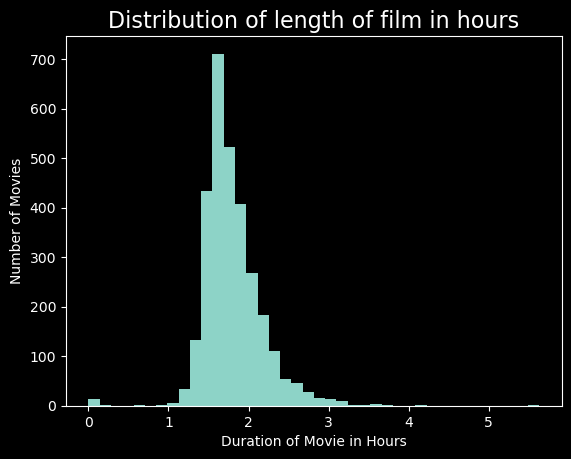

In [17]:
plt.hist(train['runtime'].fillna(0) / 60, bins=40);
plt.title('Distribution of length of film in hours', fontsize=16, color='white');
plt.xlabel('Duration of Movie in Hours')
plt.ylabel('Number of Movies')

In [18]:
train[['id','title','runtime', 'budget', 'revenue']].sort_values(['runtime'],ascending=False).head(10).style.background_gradient(subset=['runtime','budget','revenue'], cmap='YlGn')

### Carlos is the longest movie, with 338 minutes (5 hours and 38 minutes) of runtime. 

## 4. In which year most movies were released?

<Figure size 2000x1200 with 0 Axes>

<Axes: ylabel='count'>

Text(0.5, 1.0, 'Movie Release count by Year')

Text(0.5, 0, 'Release Year')

Text(0, 0.5, 'Number of Movies Release')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

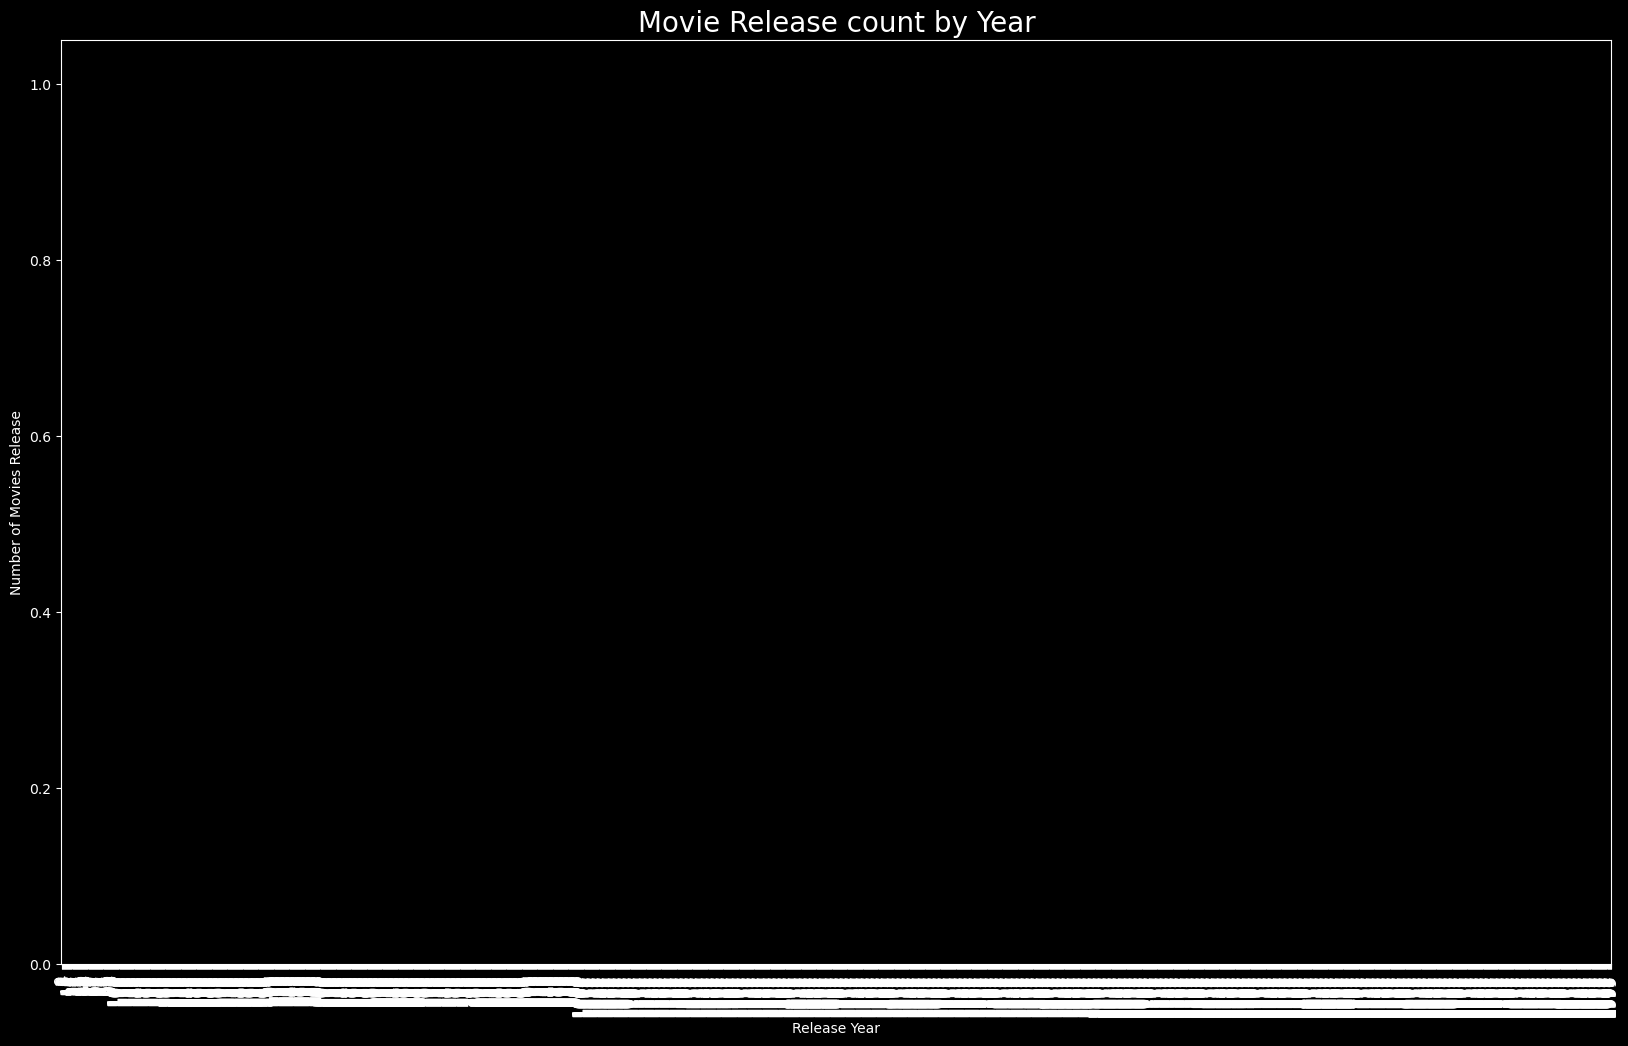

In [19]:
plt.figure(figsize=(20,12))
edgecolor=(0,0,0),
sns.countplot(train['release_year'].sort_values(), palette = "Dark2", edgecolor=(0,0,0))
plt.title("Movie Release count by Year",fontsize=20)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies Release')
plt.xticks(fontsize=12,rotation=90)
plt.show()

In [20]:
train['release_year'].value_counts().head()

release_year
2013    141
2015    128
2010    126
2012    125
2016    125
Name: count, dtype: int64

### In 2013 total 141 movies were released.

## 5. Movies with Highest and Lowest ratings.

In [21]:
train[train['popularity']==train['popularity'].max()][['original_title','popularity','release_date','revenue']]

original_title  popularity release_date    revenue
518   Wonder Woman  294.337037   2017-05-30  820580447

In [22]:
train[train['popularity']==train['popularity'].min()][['original_title','popularity','release_date','revenue']]

original_title  popularity release_date  revenue
2556       Big Time    0.000001   1988-09-15   148426

Lets create popularity distribution plot.

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='popularity'>

Text(0.5, 1.0, 'Movie Popularity Count')

Text(0.5, 0, 'Popularity')

Text(0, 0.5, 'Count')

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(-50.0, 0, '−50'),
  Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350')])

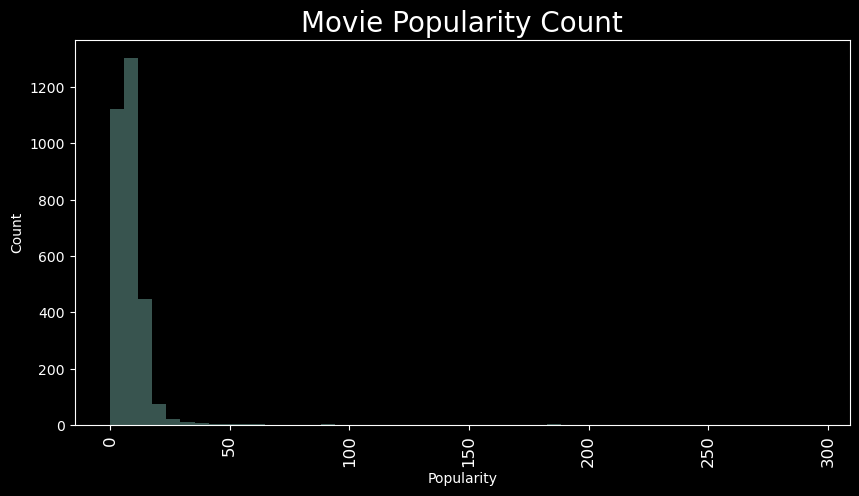

In [23]:
plt.figure(figsize=(10,5))
edgecolor=(0,0,0),
sns.distplot(train['popularity'], kde=False)
plt.title("Movie Popularity Count",fontsize=20)
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.xticks(fontsize=12,rotation=90)
plt.show()

### Wonder Woman movie have highest popularity of 294.33 whereas Big Time movie have lowest popularity which is 0.

## 6. In which month most movies are released from 1921 to 2017?

<Figure size 2000x1200 with 0 Axes>

<Axes: ylabel='count'>

Text(0.5, 1.0, 'Movie Release count by Month')

Text(0.5, 0, 'Release Month')

Text(0, 0.5, 'Number of Movies Release')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

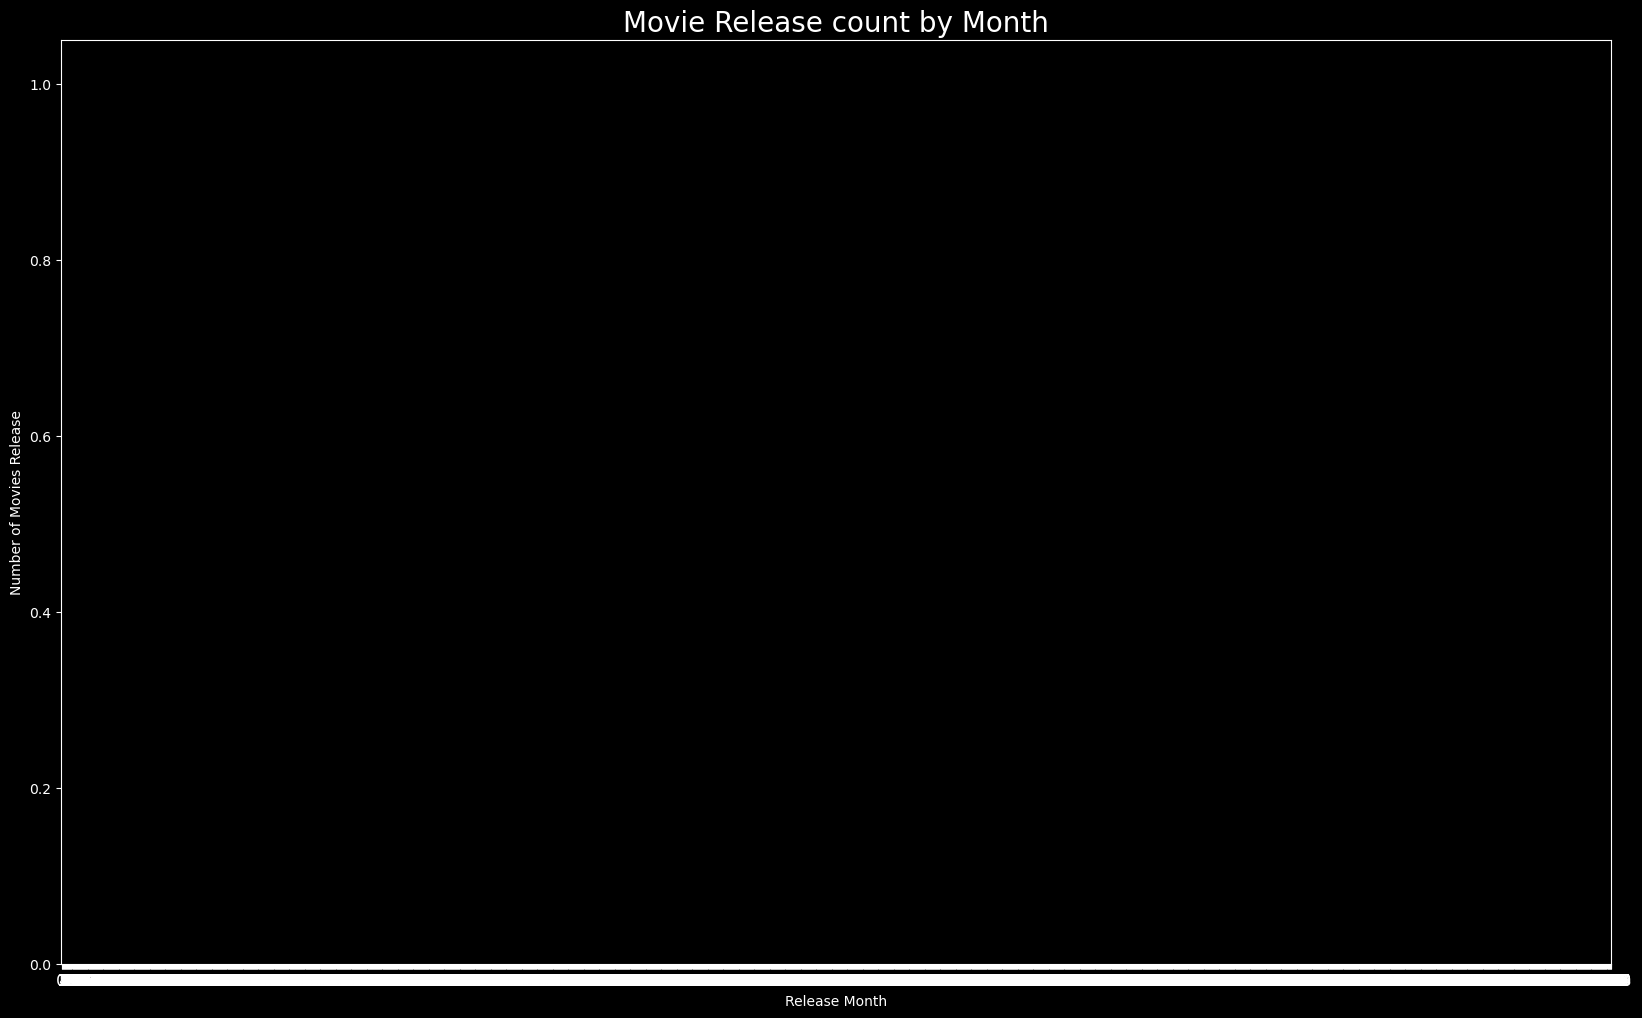

In [24]:
plt.figure(figsize=(20,12))
edgecolor=(0,0,0),
sns.countplot(train['release_month'].sort_values(), palette = "Dark2", edgecolor=(0,0,0))
plt.title("Movie Release count by Month",fontsize=20)
plt.xlabel('Release Month')
plt.ylabel('Number of Movies Release')
plt.xticks(fontsize=12)
plt.show()

In [25]:
train['release_month'].value_counts()

release_month
9     362
10    307
12    263
8     256
4     245
3     238
6     237
2     226
5     224
11    221
1     212
7     209
Name: count, dtype: int64

### In september month most movies are relesed which is around 362.

## 7. On which date of month most movies are released?

<Figure size 2000x1200 with 0 Axes>

<Axes: ylabel='count'>

Text(0.5, 1.0, 'Movie Release count by Day of Month')

Text(0.5, 0, 'Release Day')

Text(0, 0.5, 'Number of Movies Release')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

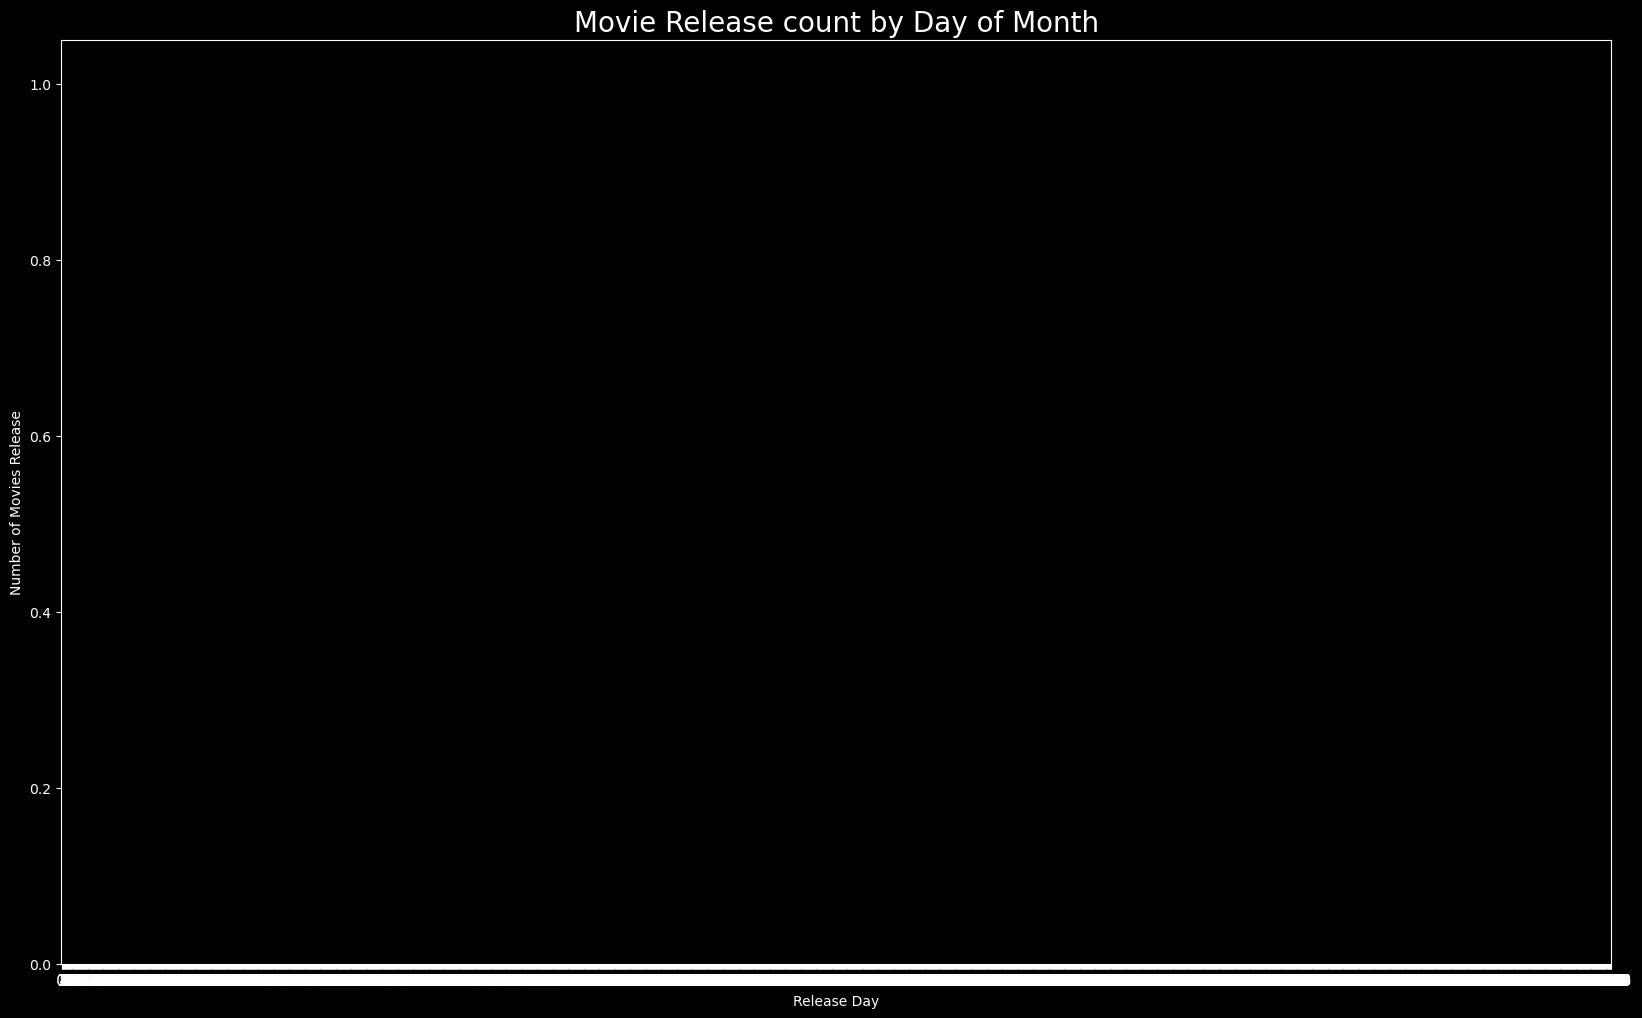

In [26]:
plt.figure(figsize=(20,12))
edgecolor=(0,0,0),
sns.countplot(train['release_day'].sort_values(), palette = "Dark2", edgecolor=(0,0,0))
plt.title("Movie Release count by Day of Month",fontsize=20)
plt.xlabel('Release Day')
plt.ylabel('Number of Movies Release')
plt.xticks(fontsize=12)
plt.show()

In [27]:
train['release_day'].value_counts()

release_day
1     152
15    126
12    122
7     110
6     107
16    106
25    106
13    106
17    106
9     104
10    104
14    104
22    102
8     101
21     99
18     98
24     97
5      96
2      94
19     94
11     93
4      88
20     87
23     85
26     82
3      80
30     75
28     74
27     74
29     72
31     56
Name: count, dtype: int64

### On first date highest number of movies are released, 152.

## 8. On which day of week most movies are released?

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(train['release_weekday'].sort_values(), palette='Dark2')
loc = np.array(range(len(train['release_weekday'].unique())))
day_labels = ['Mon', 'Tue', 'Wed','Thu', 'Fri', 'Sat', 'Sun']
plt.xlabel('Release Day of Week')
plt.ylabel('Number of Movies Release')
plt.xticks(loc, day_labels, fontsize=19)
plt.show()

<Figure size 1000x500 with 0 Axes>